In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def upperbound(p2, n2, p3, n3, N, l, E, const=1): 
  """Calculates the upper bound."""
  r = min(p2**(n2-1)*(p2-1), p3**(n3-1)*(p3-1))
  return N * l * E * (4*p2*p3*r**2 + 6*p2*r*p3**(n3) + 2*r*p2 + 3*p2**n2) * const

def prob_upperbound(p2, n2, p3, n3, N, l, E, const=1):
  """Calculates the probabilistic upper bound."""
  r = min(p2**(n2-1)*(p2-1), p3**(n3-1)*(p3-1))
  return np.sqrt(N * l) * E * r**3 * (4*p2*p3*r**2 + 6*p2*r*p3**(n3) + 2*r*p2 + 3*p2**n2) * const        

In [ ]:
# --- Parameters ---
p1, n1 = 13, 1
p2, n2 = 3, 1
p3, n3 = 5, 1
N_calc = p1**n1 * p2**n2 * p3**n3
l = 100
E = 7
r = min(p2**(n2-1)*(p2-1), p3**(n3-1)*(p3-1))

In [6]:
print(4*p2*p3*r**2 + 6*p2*r*p3**(n3) + 2*r*p2 + 3*p2**n2)

441


In [ ]:
# --- Line Data ---
x_line = np.arange(1, 11)
y_line = x_line * prob_upperbound(p2, n2, p3, n3, N_calc, l, E) + E

# --- Scatter Data ---
x_scatter = np.arange(1, 11)
y_scatter = np.array([
    4149.25, 5577.30, 6180.20, 7822.80, 8972.15,
    9644.25, 11190.15, 11499.80, 13705.00, 12766.80
])


In [8]:
for i in range(len(x_scatter)):
    print(y_scatter[i]/(prob_upperbound(p2, n2, p3, n3, N_calc, l, E)*x_scatter[i]+E))

0.0009045504122772281
0.0006079355140991775
0.0004491018975517678
0.00042634964535229246
0.00039119223423027494
0.00035041358508328845
0.00034849905872189117
0.0003133747882390513
0.00033197111167874635
0.0002783209029112256


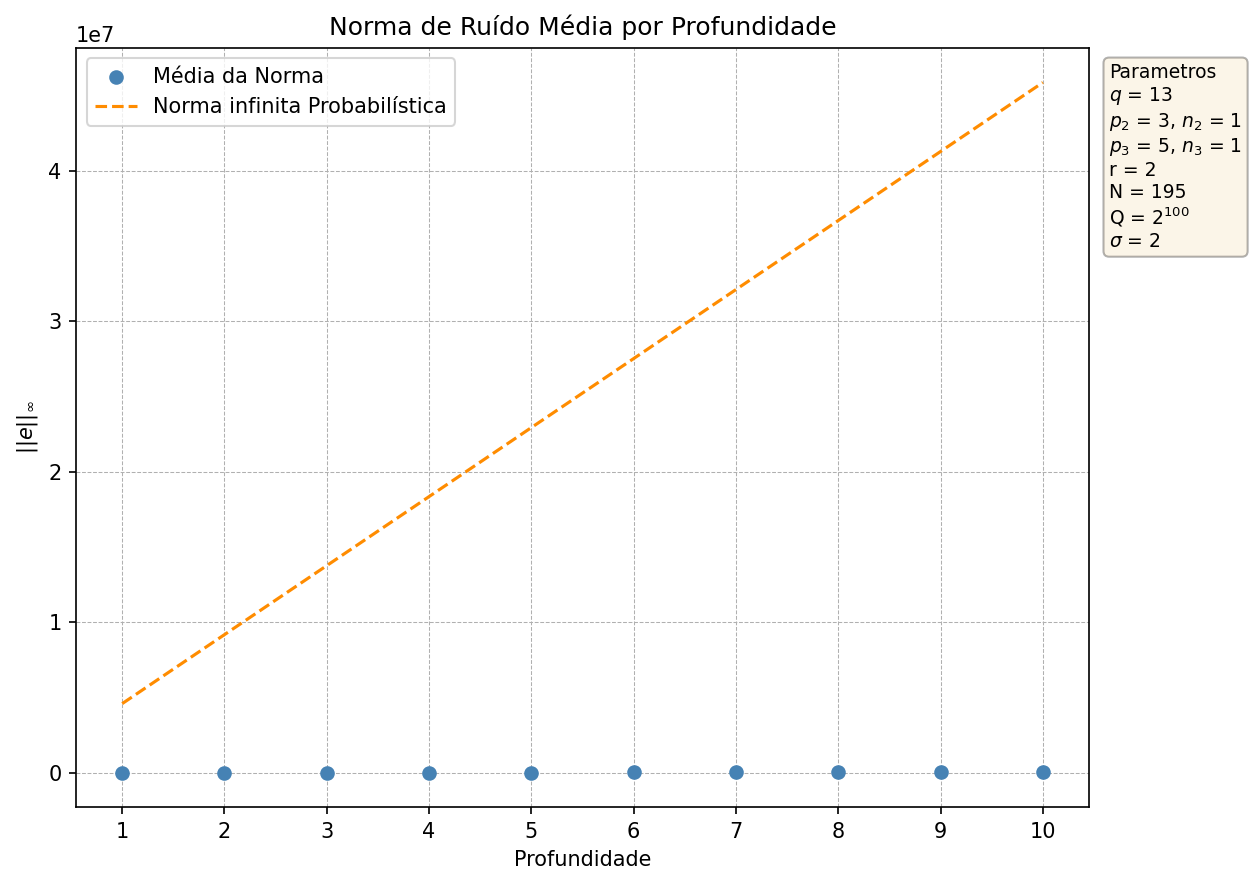

In [10]:
# Create a figure with higher resolution
plt.figure(figsize=(10, 6), dpi=150)

# --- Plotting with Improvements ---
# 1. Plotted points and line with distinct colors and descriptive labels
plt.scatter(x_scatter, y_scatter, color="steelblue", label="Média da Norma", zorder=5)
plt.plot(x_line, y_line, color="darkorange", linestyle='--', label="Norma infinita Probabilística")

# --- Grid and Ticks ---
plt.grid(which="both", axis="y", linestyle="--", linewidth=0.5)
plt.xticks(np.arange(1, 11, 1)) # Set x-ticks to match data range 1-10
plt.grid(which="major", axis="x", linestyle="--", linewidth=0.5)

# --- Titles and Labels ---
plt.title("Norma de Ruído Média por Profundidade")
plt.ylabel("$||e||_{\infty}$") # Corrected Y-axis label to reflect data
plt.xlabel("Profundidade")

# 2. Added a standard legend for plot elements inside the plot area
plt.legend(loc='upper left')

# --- Parameter Information Box ---
# Using a text box is a cleaner way to display static parameter information
p1, n1 = 13, 1
p2, n2 = 3, 1
p3, n3 = 5, 1
n = 195
r = 2
Q = 2**100
sigma = 2

param_text = (
    f"Parametros\n"
    f"$q$ = {p1**n1}\n"
    f"$p_2$ = {p2}, $n_2$ = {n2}\n"
    f"$p_3$ = {p3}, $n_3$ = {n3}\n"
    f"r = {r}\n"
    f"N = {n}\n"
    f"Q = $2^{{100}}$\n"
    f"$\\sigma$ = {sigma}"
)

# Place the text box outside the plot on the right side
plt.text(1.02, 0.98, param_text, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Adjust layout to prevent the text box from being cut off
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()